# Algorithms

## Libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image
from collections import deque
from typing import List, Any, Tuple
import networkx as nx
import matplotlib.pyplot as plt
import copy

## Advances


1.   Neural Network from scratch
1.   Forward propagation
3.   Backward propagation
4.   Kahns topological order





In [2]:
def activation_derivative(output_value: float):
    return 1 - output_value ** 2
class Gen_neuron:
    def __init__(self, neuron_id: int, neuron_type: str, bias: float) -> None:
        self.neuron_id = neuron_id
        self.neuron_type = neuron_type
        self.output_value = 0.0
        self.bias = bias
class Neuron(Gen_neuron):
      activation_function = np.tanh
      activation_derivate = activation_derivative

class Gen_connection:
    def __init__(self, from_neuron_id: int, to_neuron_id: int, weight: float, enabled: bool = True) -> None:
        self.from_neuron_id = from_neuron_id
        self.to_neuron_id = to_neuron_id
        self.weight = weight
        self.enabled = True
class Connection(Gen_connection):
    pass

class Genotype:
    def __init__(self) -> None:
        self.neurons = []
        self.connections = []
        self.layers = []
    def add_neuron(self, neuron: Gen_neuron):
        self.neurons.append(neuron)
    def add_connection(self, connection: Gen_connection):
        self.connections.append(connection)
    def stablish_layers(self, layers_array):
        self.layers = layers_array
    def delete_connection(self):
        self.connections = self.connections[:-1]


class Network(Genotype):
    def forward_propagator(self, input_values: List[Any]):
        order = kahn_topological_order(self)
        print('kahn_topological_order : ')
        print(order)
        for index, (neuron, input_value) in enumerate(zip(self.layers[0], input_values)):
            if neuron.neuron_type == 'input':
                neuron.output_value = input_value
                self.neurons[index] = neuron

        for neuron_id in order:
            neuron = self.neurons[neuron_id]
            if neuron.neuron_type != 'input':
                weighted_inputs = []
                for connection in self.connections:
                    if connection.to_neuron_id == neuron.neuron_id and connection.enabled:
                        from_neuron = self.neurons[connection.from_neuron_id]
                        weighted_inputs.append(from_neuron.output_value * connection.weight)
                neuron.output_value = neuron.activation_function(abs(sum(weighted_inputs) - neuron.bias))
                self.neurons[neuron_id] = neuron

    def backward_propagator(self, target_values, learning_rate: float = 0.01):
        errors = []
        order = kahn_topological_order(self)
        reversed_order = order[::-1]

        for i, output_neuron in enumerate(self.layers[-1]):
            output_error = (target_values[i] - output_neuron.output_value)**2
            errors.append(output_error)
            output_neuron.delta = output_error * activation_derivative(output_neuron.output_value)

        for neuron_id in reversed_order:
            neuron = self.neurons[neuron_id]
            if neuron.neuron_type != 'output':
                error_sum = 0.0
                for connection in self.connections:
                    if connection.from_neuron_id == neuron.neuron_id and connection.enabled:
                        to_neuron = self.neurons[connection.to_neuron_id]
                        error_sum += to_neuron.delta * connection.weight
                neuron.delta = error_sum * activation_derivative(neuron.output_value)

        for connection in self.connections:
            if connection.enabled:
                from_neuron = self.neurons[connection.from_neuron_id]
                to_neuron = self.neurons[connection.to_neuron_id]
                connection.weight += learning_rate * to_neuron.delta * from_neuron.output_value
                from_neuron.bias += learning_rate * to_neuron.delta


    def mutate():
      pass
def kahn_topological_order(network: Network):
    neurons = network.neurons
    if network.connections != []:
      connections = network.connections
      in_degree = {neuron.neuron_id: 0 for neuron in neurons}
      adj_list = {neuron.neuron_id: [] for neuron in neurons}
      for connection in connections:
          if connection.enabled:
              adj_list[connection.from_neuron_id].append(connection.to_neuron_id)
              in_degree[connection.to_neuron_id] += 1
      queue = deque([neuron_id for neuron_id in in_degree if in_degree[neuron_id] == 0])
      topological_order = []
      while queue:
          current = queue.popleft()
          topological_order.append(current)
          for neighbor in adj_list[current]:
              in_degree[neighbor] -= 1
              if in_degree[neighbor] == 0:
                  queue.append(neighbor)
      if len(topological_order) != len(neurons):
          return None

      return topological_order
    else:
      return []
def Node_generator(Net: Network, Gen: Genotype, G, Num_neurons_hidden, Num_neurons_input, Num_neurons_output, sub):
    positions = []
    Connections_hidden = [i + Num_neurons_input for i in range(Num_neurons_hidden)]
    Connections_output =  [i + Num_neurons_input + Num_neurons_hidden for i in range(Num_neurons_output)]
    for ID in range(Num_neurons_hidden + Num_neurons_input + Num_neurons_output):
      if ID < Num_neurons_input:
        while True:
          position = (-4,np.random.randint(-15,15))
          if position not in positions:
            positions.append(position)
            break
        G.add_node(ID, pos=position)
        bias = np.random.uniform(0,0.3)
        neuron = Neuron(neuron_id = ID, neuron_type = 'input', bias = bias)
        sub.append(neuron)
        Net.add_neuron(neuron)
        Gen.add_neuron(neuron)
      elif ID >= Num_neurons_input and ID < Num_neurons_hidden + Num_neurons_input:
        while True:
          position = (np.random.randint(-3,3),np.random.randint(-15,15))
          if position not in positions:
            positions.append(position)
            break
        G.add_node(ID, pos=position)
        bias = np.random.uniform(0,0.3)
        neuron = Neuron(neuron_id = ID, neuron_type = 'hidden', bias = bias)
        sub.append(neuron)
        Net.add_neuron(neuron)
        Gen.add_neuron(neuron)
      else:
        while True:
          position = (4,np.random.randint(-15,15))
          if position not in positions:
            positions.append(position)
            break
        G.add_node(ID, pos=position)
        bias = np.random.uniform(0,0.3)
        neuron = Neuron(neuron_id = ID, neuron_type = 'output', bias = bias)
        sub.append(neuron)
        Net.add_neuron(neuron)
        Gen.add_neuron(neuron)

    Gen.layers.append(sub[:Num_neurons_input])
    Gen.layers.append(sub[Num_neurons_input:Num_neurons_hidden+Num_neurons_input])
    Gen.layers.append(sub[Num_neurons_hidden+Num_neurons_input:])
    Net.layers.append(sub[:Num_neurons_input])
    Net.layers.append(sub[Num_neurons_input:Num_neurons_hidden+Num_neurons_input])
    Net.layers.append(sub[Num_neurons_hidden+Num_neurons_input:])


def Net_Gen_road_creator(Net: Network, Gen: Genotype, tuple_nodes: Tuple, list_connections: List[List[int]], G: nx.DiGraph, dx):
    if tuple_nodes not in list_connections and tuple_nodes[::-1] not in list_connections and dx[tuple_nodes[1]] < 4:
        weight = np.random.uniform(0,1)
        conn = Connection(tuple_nodes[0], tuple_nodes[1], weight)
        Net_copy = copy.deepcopy(Net)
        Net_copy.add_connection(conn)
        order = kahn_topological_order(Net_copy)
        if order is None:
            return None
        Net.add_connection(conn)
        Gen.add_connection(conn)
        G.add_edge(tuple_nodes[0], tuple_nodes[1])
        dx[tuple_nodes[1]] += 1
        list_connections.append(tuple_nodes)

def player_X_caller(Net: Network, Gen: Genotype, G, dx = None) -> None:
    if dx is None:
        dx = {i: 0 for i in range(len(Net.neurons))}
    set_inputs, set_outputs, set_hidden = set(), set(), set()
    list_connections = []
    while True:
        current_neuron = Net.neurons.index(np.random.choice(Net.layers[-1]))
        set_outputs.add(current_neuron)
        num_pre_neurons = np.random.randint(1, len(Net.layers[1]))
        pre_neurons = np.random.choice(Net.layers[1], size=num_pre_neurons, replace=False)
        for pre_neuron in pre_neurons:
            if pre_neuron != current_neuron:
                tuple_nodes = [Net.neurons.index(pre_neuron), current_neuron]
                Net_Gen_road_creator(Net, Gen, tuple_nodes, list_connections, G, dx)
                if tuple_nodes in list_connections:
                    current_neuron = tuple_nodes[0]
                    set_hidden.add(current_neuron)
        last_neuron = Net.neurons.index(np.random.choice(Net.layers[0]))
        tuple_nodes = [last_neuron, current_neuron]
        Net_Gen_road_creator(Net, Gen, tuple_nodes, list_connections, G, dx)
        if tuple_nodes in list_connections:
            current_neuron = tuple_nodes[0]
            set_inputs.add(current_neuron)
        if (len(set_outputs) == len(Net.layers[-1]) and len(set_inputs) == len(Net.layers[0]) and len(set_hidden) == len(Net.layers[1])):
            break

## Call

[0, 3, 1, 2, 5, 4, 6]


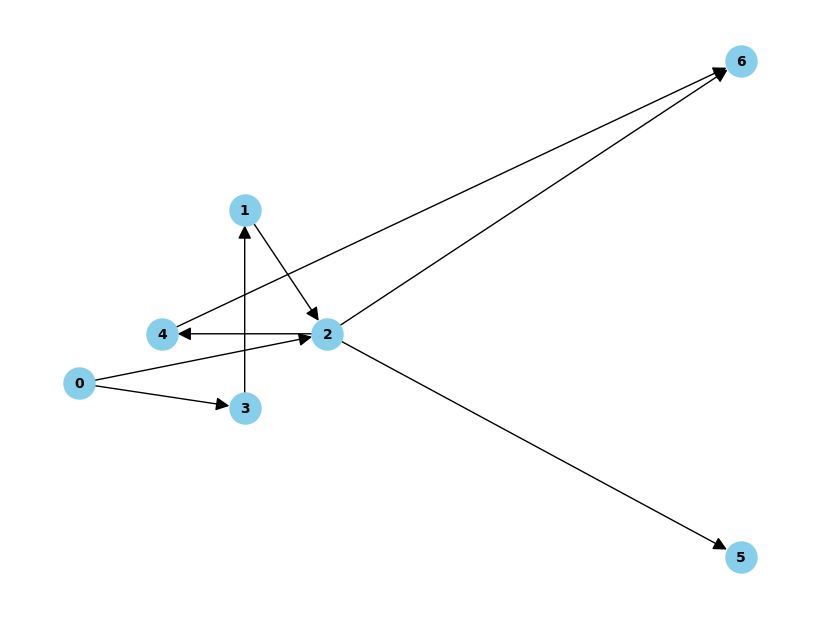

In [5]:
for _ in range(1):
    Num_neurons_input = 1
    Num_neurons_hidden = np.random.randint(3,5)
    Num_neurons_output = 2
    Net = Network()
    Gen = Genotype()
    G = nx.DiGraph()
    
    Node_generator(Net, Gen, G, Num_neurons_hidden, Num_neurons_input, Num_neurons_output, [])
    player_X_caller(Net, Gen, G)

    values = [np.random.uniform(0,10) for _ in range(Num_neurons_output)]
    target_values = [np.random.randint(0,10) for _ in range(Num_neurons_output)]
    Net.forward_propagator(values)
    Net.backward_propagator(target_values)

    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
    plt.show()


